In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2

In [36]:
print("GPU ","available " if tf.config.list_physical_devices("GPU") else "Not available")

GPU  Not available


In [37]:
img = image.load_img("./Data/train/Hibiscus/IMG_20211106_161646.jpg")

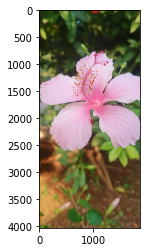

In [38]:
plt.imshow(img)

In [39]:
cv2.imread("./Data/train/Hibiscus/IMG_20211106_161646.jpg").shape

(4032, 1872, 3)

In [40]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [41]:
train_dataset = train.flow_from_directory("./Data/train/", target_size=(224,224), batch_size=16,class_mode="categorical")

Found 5201 images belonging to 5 classes.


In [42]:
validation_dataset = train.flow_from_directory("./Data/test/", target_size=(224,224), batch_size=16,class_mode="categorical")

Found 1330 images belonging to 5 classes.


In [43]:
train_dataset.class_indices

{'Hibiscus': 0, 'Jasmine': 1, 'Pine tree': 2, 'Rose': 3, 'Tulsi': 4}

In [44]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4])

In [45]:
train_dataset.classes.size

5201

In [46]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu",input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512,activation='relu'),
    
    tf.keras.layers.Dense(5, activation='softmax'),
])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [47]:
model.compile(optimizer='adam',
                metrics=['accuracy'],
              loss='squared_hinge'
             )

In [48]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=10,
                      epochs=5,
                      validation_data = validation_dataset
                     )

Epoch 1/5
10/10 [==============================] - 180s 20s/step - loss: 1.4207 - accuracy: 0.1724 - val_loss: 1.3708 - val_accuracy: 0.2865
Epoch 2/5
10/10 [==============================] - 186s 20s/step - loss: 1.4350 - accuracy: 0.2062 - val_loss: 1.3708 - val_accuracy: 0.2865
Epoch 3/5
10/10 [==============================] - 197s 21s/step - loss: 1.4850 - accuracy: 0.1437 - val_loss: 1.3708 - val_accuracy: 0.2865
Epoch 4/5
10/10 [==============================] - 193s 21s/step - loss: 1.4014 - accuracy: 0.2483 - val_loss: 1.3708 - val_accuracy: 0.2865
Epoch 5/5
10/10 [==============================] - 206s 23s/step - loss: 1.4200 - accuracy: 0.2250 - val_loss: 1.3708 - val_accuracy: 0.2865


In [49]:
from tensorflow.keras.models import load_model

model.save('model_DL.h5')

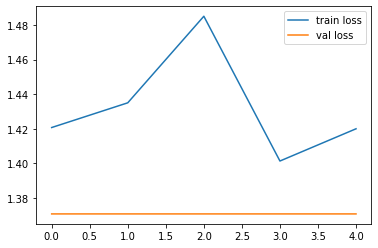

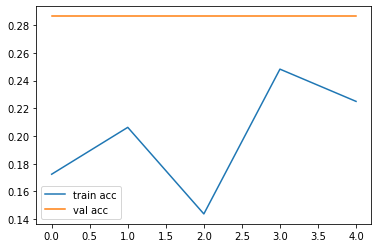

In [50]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

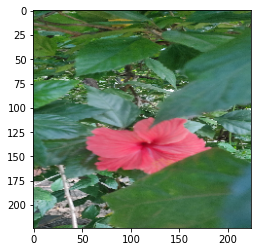

[[0. 0. 0. 0. 1.]]


In [51]:
model=load_model('model_DL.h5')

img = image.load_img("./Data/test/Hibiscus/IMG20211105155536_BURST002.jpg",target_size=(224,224))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
val = model.predict(images)

# 'Hibiscus': 0, 'Jasmine': 1, 'Pine tree': 2, 'Rose': 3, 'Tulsi': 4
print(val)

In [54]:
imagePath = "./Data/train/Rose/IMG20211108070232_BURST000_COVER.jpg"

from keras.preprocessing import image

test_image = image.load_img(imagePath, target_size = (224, 224)) 
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
result

array([[0., 0., 0., 0., 1.]], dtype=float32)